<a href="https://colab.research.google.com/github/sun-fox/GluonCV-Mxnet/blob/master/Gluon_Dataloaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mxnet-cu101mkl
!pip install gluoncv

     |████████████████████████████████| 711.0MB 24kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 757kB 3.5MB/s 


In [0]:
import mxnet as mx
from mxnet import gluon,nd
from matplotlib.pyplot import imshow
%matplotlib inline

In [0]:
mx.random.seed(42)
X=mx.random.uniform(shape=(10,3))
y=mx.random.uniform(shape=(10,1))
dataset = gluon.data.dataset.ArrayDataset(X,y)

# **DataLoader**

The gluon dataloader wraps around the gluon datasets to create minibatches of samples from the dataset. It provides a convenient iterator interface for looping through data. Internally the dataloader uses a batch sampler that returns a batch or random indices to be retrieved from the dataset. A required parameter of dataloader is the size of the minibatches you want to create, called batch size. We see that iterating over the dataset produces minibatches of five and the loop ends after two iterations.Since we have just 10 data points in our dataset and five times two is 10. Sometimes the dataset length is indivisible by the minibatch size, living a final batch with a smaller number of samples. Dataloaders default behavior is to return this smaller minibatch but this can be changed by setting the last batch parameter to discard, which ignores the last batch or roll-over which starts the next epoch with the remaining samples. One great benefit of using dataloader is the ability to easily load data in parallel using multiprocessing. You can set the non-workers parameter to the number of CPUs available on your machine for maximum performance or limited to a lower number to keep resources free. Here, we import the multiprocessing module from the Python Standard Library to get the available number of CPUs on the machine. We can then set non-workers argument in the dataloader constructor to this value, to ensure that multiple workers are fetched in different batches of the data for maximum parallelism.

In [6]:
data_loader = gluon.data.DataLoader(dataset, batch_size=3, last_batch='keep')

for X_batch, y_batch in data_loader:
  print("X_batch has shape {}, and y_batch has shape {}".format(X_batch.shape,y_batch.shape))

X_batch has shape (3, 3), and y_batch has shape (3, 1)
X_batch has shape (3, 3), and y_batch has shape (3, 1)
X_batch has shape (3, 3), and y_batch has shape (3, 1)
X_batch has shape (1, 3), and y_batch has shape (1, 1)


# **Parallel Data Loading**

DataLoader allows loading data in parallel for multiprocessing and max performance.


In [7]:
from multiprocessing import cpu_count
CPU_COUNT = cpu_count()

data_loader = gluon.data.DataLoader(dataset, batch_size=3, num_workers=CPU_COUNT)

for X_batch, y_batch in data_loader:
  print("X_batch has shape {}, and y_batch has shape {}".format(X_batch.shape,y_batch.shape))

X_batch has shape (3, 3), and y_batch has shape (3, 1)
X_batch has shape (3, 3), and y_batch has shape (3, 1)
X_batch has shape (3, 3), and y_batch has shape (3, 1)
X_batch has shape (1, 3), and y_batch has shape (1, 1)


In [8]:
CPU_COUNT

2

# **Lazy Transformations with Augementation**

The transformations are applied while fetching the data batch. Here, we import the provider gluon transform submodule and compose two different data transformations, a random horizontal flip and a random vertical flip. The dataloader constructor also accepts a shuffle argument to shuffle our training data and break any spurious relationships in the order we encounter data samples during training. We can visualize the result of applying the composed data transformations and shuffling on the dataset. Here, we see that a digit has been flipped due to the transformation. Now you've seen how to create datasets, transform them and get samples from them into neural networks all using the gluon data API.

In [0]:
from mxnet.gluon.data.vision import transforms

train_dataset = gluon.data.vision.datasets.MNIST(train=True)
transform_fn = transforms.Compose([transforms.RandomFlipTopBottom(),
                                   transforms.RandomFlipLeftRight()])

In [0]:
train_dataloader = gluon.data.DataLoader(train_dataset.transform_first(transform_fn),batch_size=5,shuffle=True)

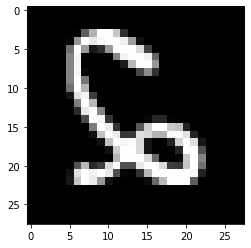

In [27]:
for X_batch, y_batch in train_dataloader:
  imshow(X_batch[3,:,:,0].asnumpy(),cmap='gray')
  break